In [2]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Calculate the count of each satisfaction level
satisfaction_counts = data['satisfaction'].value_counts()

# Convert the counts to a DataFrame for Plotly
df_satisfaction = pd.DataFrame({'Satisfaction': satisfaction_counts.index, 'Counts': satisfaction_counts.values})

# Create the pie chart
fig = px.pie(df_satisfaction, values='Counts', names='Satisfaction', title='Customer Satisfaction Levels',
             color_discrete_sequence=px.colors.sequential.RdBu, 
             hover_data={'Counts': True})  # Shows count on hover

# Improve the hover template to show percentages as well
fig.update_traces(textposition='inside', textinfo='percent+label',
                  hovertemplate='Satisfaction: %{label}<br>Count: %{value}<br>Percentage: %{percent}')

# Show the plot
fig.show()
fig.write_html('ratiosatisfaction.html')


In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Calculate the mode of the satisfaction column
mode_satisfaction = data['satisfaction'].mode()

# Calculate frequency distribution
frequency_distribution = data['satisfaction'].value_counts()

# Print the results
print("Mode of Satisfaction:")
print(mode_satisfaction)
print("\nFrequency Distribution of Satisfaction:")
print(frequency_distribution)


Mode of Satisfaction:
0    neutral or dissatisfied
Name: satisfaction, dtype: object

Frequency Distribution of Satisfaction:
satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64


In [4]:
# Crosstab to see the satisfaction distribution across different classes
class_satisfaction = pd.crosstab(data['Class'], data['satisfaction'], normalize='index') * 100

print("\nSatisfaction by Flight Class (Percentage):")
print(class_satisfaction)



Satisfaction by Flight Class (Percentage):
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.484194  69.515806
Eco                         80.612245  19.387755
Eco Plus                    75.221701  24.778299


In [5]:
# Satisfaction by type of travel
travel_type_satisfaction = pd.crosstab(data['Type of Travel'], data['satisfaction'], normalize='index') * 100

print("\nSatisfaction by Type of Travel (Percentage):")
print(travel_type_satisfaction)



Satisfaction by Type of Travel (Percentage):
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.179732  58.820268
Personal Travel                90.010078   9.989922


In [6]:
# Bin ages into groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Satisfaction by age group
age_group_satisfaction = pd.crosstab(data['Age Group'], data['satisfaction'], normalize='index') * 100

print("\nSatisfaction by Age Group (Percentage):")
print(age_group_satisfaction)

## GRAPH GRAPH GRAPH ##


Satisfaction by Age Group (Percentage):
satisfaction  neutral or dissatisfied  satisfied
Age Group                                       
0-18                        80.981027  19.018973
19-35                       62.575403  37.424597
36-50                       46.123373  53.876627
51-65                       48.539017  51.460983
65+                         80.943215  19.056785


In [7]:
# Filter data by satisfaction
satisfied_customers = data[data['satisfaction'] == 'satisfied']
dissatisfied_customers = data[data['satisfaction'] == 'neutral or dissatisfied']

# Basic statistics for 'Flight Distance' for satisfied vs. dissatisfied customers
print("\nAverage Flight Distance for Satisfied Customers:", satisfied_customers['Flight Distance'].mean())
print("Average Flight Distance for Dissatisfied Customers:", dissatisfied_customers['Flight Distance'].mean())

# Departure and Arrival Delays
print("\nAverage Departure Delay for Satisfied Customers:", satisfied_customers['Departure Delay in Minutes'].mean())
print("Average Departure Delay for Dissatisfied Customers:", dissatisfied_customers['Departure Delay in Minutes'].mean())
print("Average Arrival Delay for Satisfied Customers:", satisfied_customers['Arrival Delay in Minutes'].mean())
print("Average Arrival Delay for Dissatisfied Customers:", dissatisfied_customers['Arrival Delay in Minutes'].mean())



Average Flight Distance for Satisfied Customers: 1527.1657458563536
Average Flight Distance for Dissatisfied Customers: 932.929252727647

Average Departure Delay for Satisfied Customers: 12.12163465754626
Average Departure Delay for Dissatisfied Customers: 16.01537089137446
Average Arrival Delay for Satisfied Customers: 12.150901891772987
Average Arrival Delay for Dissatisfied Customers: 16.76693281938326


In [8]:
import pandas as pd

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Filter data by satisfaction status
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

# Function to calculate statistics
def calculate_statistics(data, column_name):
    mean_val = data[column_name].mean()
    median_val = data[column_name].median()
    mode_val = data[column_name].mode()[0]  # mode can be multi-modal, taking the first one
    range_val = data[column_name].max() - data[column_name].min()
    return mean_val, median_val, mode_val, range_val

# Statistics for 'Flight Distance'
stats_flight_distance_satisfied = calculate_statistics(satisfied, 'Flight Distance')
stats_flight_distance_dissatisfied = calculate_statistics(dissatisfied, 'Flight Distance')

# Statistics for 'Departure Delay in Minutes'
stats_departure_delay_satisfied = calculate_statistics(satisfied, 'Departure Delay in Minutes')
stats_departure_delay_dissatisfied = calculate_statistics(dissatisfied, 'Departure Delay in Minutes')

# Statistics for 'Arrival Delay in Minutes'
stats_arrival_delay_satisfied = calculate_statistics(satisfied, 'Arrival Delay in Minutes')
stats_arrival_delay_dissatisfied = calculate_statistics(dissatisfied, 'Arrival Delay in Minutes')

# Print the results
print("Flight Distance Statistics (Satisfied vs Dissatisfied):")
print("Satisfied: Mean = {}, Median = {}, Mode = {}, Range = {}".format(*stats_flight_distance_satisfied))
print("Dissatisfied: Mean = {}, Median = {}, Mode = {}, Range = {}".format(*stats_flight_distance_dissatisfied))

print("\nDeparture Delay Statistics (Satisfied vs Dissatisfied):")
print("Satisfied: Mean = {}, Median = {}, Mode = {}, Range = {}".format(*stats_departure_delay_satisfied))
print("Dissatisfied: Mean = {}, Median = {}, Mode = {}, Range = {}".format(*stats_departure_delay_dissatisfied))

print("\nArrival Delay Statistics (Satisfied vs Dissatisfied):")
print("Satisfied: Mean = {}, Median = {}, Mode = {}, Range = {}".format(*stats_arrival_delay_satisfied))
print("Dissatisfied: Mean = {}, Median = {}, Mode = {}, Range = {}".format(*stats_arrival_delay_dissatisfied))


Flight Distance Statistics (Satisfied vs Dissatisfied):
Satisfied: Mean = 1527.1657458563536, Median = 1237.0, Mode = 337, Range = 4952
Dissatisfied: Mean = 932.929252727647, Median = 679.0, Mode = 337, Range = 4952

Departure Delay Statistics (Satisfied vs Dissatisfied):
Satisfied: Mean = 12.12163465754626, Median = 0.0, Mode = 0, Range = 624
Dissatisfied: Mean = 16.01537089137446, Median = 0.0, Mode = 0, Range = 1128

Arrival Delay Statistics (Satisfied vs Dissatisfied):
Satisfied: Mean = 12.150901891772987, Median = 0.0, Mode = 0.0, Range = 615.0
Dissatisfied: Mean = 16.76693281938326, Median = 0.0, Mode = 0.0, Range = 1115.0


In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Filter data by satisfaction status
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

# Function to calculate statistics
def calculate_statistics(data, column_name):
    mean_val = data[column_name].mean()
    median_val = data[column_name].median()
    mode_val = data[column_name].mode()[0]  # mode can be multi-modal, taking the first one
    range_val = data[column_name].max() - data[column_name].min()
    return mean_val, median_val, mode_val, range_val

# Statistics and visualizations
def display_statistics_and_plots(column_name):
    # Calculate statistics
    stats_satisfied = calculate_statistics(satisfied, column_name)
    stats_dissatisfied = calculate_statistics(dissatisfied, column_name)
    
    # Print statistics
    print(f"{column_name} Statistics (Satisfied vs Dissatisfied):")
    print("Satisfied: Mean = {:.2f}, Median = {:.2f}, Mode = {:.2f}, Range = {:.2f}".format(*stats_satisfied))
    print("Dissatisfied: Mean = {:.2f}, Median = {:.2f}, Mode = {:.2f}, Range = {:.2f}".format(*stats_dissatisfied))
    
    # Create histograms
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=satisfied[column_name], name='Satisfied', opacity=0.75))
    fig.add_trace(go.Histogram(x=dissatisfied[column_name], name='Dissatisfied', opacity=0.75))
    
    # Update layout
    fig.update_layout(
        title_text=f'Distribution of {column_name} - Satisfied vs Dissatisfied',
        xaxis_title_text=column_name,
        yaxis_title_text='Count',
        bargap=0.2, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinate
    )
    
    # Show the plot
    fig.show()

# Display statistics and plots for each variable
display_statistics_and_plots('Flight Distance')
# Save the plot as an HTML file


display_statistics_and_plots('Departure Delay in Minutes')
# Save the plot as an HTML file


display_statistics_and_plots('Arrival Delay in Minutes')



Flight Distance Statistics (Satisfied vs Dissatisfied):
Satisfied: Mean = 1527.17, Median = 1237.00, Mode = 337.00, Range = 4952.00
Dissatisfied: Mean = 932.93, Median = 679.00, Mode = 337.00, Range = 4952.00


Departure Delay in Minutes Statistics (Satisfied vs Dissatisfied):
Satisfied: Mean = 12.12, Median = 0.00, Mode = 0.00, Range = 624.00
Dissatisfied: Mean = 16.02, Median = 0.00, Mode = 0.00, Range = 1128.00


Arrival Delay in Minutes Statistics (Satisfied vs Dissatisfied):
Satisfied: Mean = 12.15, Median = 0.00, Mode = 0.00, Range = 615.00
Dissatisfied: Mean = 16.77, Median = 0.00, Mode = 0.00, Range = 1115.00


In [10]:
import pandas as pd
import plotly.express as px


## NaN handled by choosing median as the value as a robost method ##

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Handle missing values in 'Arrival Delay in Minutes'
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

# Sample the data to make the bubble chart more manageable and clear
sampled_data = data.sample(n=1000, random_state=1)

# Create the bubble chart
fig = px.scatter(sampled_data, 
                 x='Flight Distance', 
                 y='Departure Delay in Minutes', 
                 size='Arrival Delay in Minutes', 
                 color='satisfaction', 
                 hover_name='satisfaction', 
                 size_max=60, 
                 title='Interactive Bubble Chart: Flight Distance vs Departure Delay by Arrival Delay',
                 labels={'Flight Distance': 'Flight Distance (miles)',
                         'Departure Delay in Minutes': 'Departure Delay (min)',
                         'Arrival Delay in Minutes': 'Bubble Size: Arrival Delay (min)'})

# Improve layout
fig.update_layout(
    xaxis_title="Flight Distance (miles)",
    yaxis_title="Departure Delay (minutes)",
    legend_title="Customer Satisfaction"
)

# Show the plot
fig.show()
# Save the plot as an HTML file
fig.write_html('bubble1.html')

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Calculate correlation between Departure Delay and Arrival Delay
correlation = data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr().iloc[0, 1]

# Create the scatter plot with trend lines
fig = px.scatter(data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                 color='satisfaction', symbol='satisfaction', title='Departure vs Arrival Delay by Satisfaction',
                 trendline='ols', hover_data=['Flight Distance'])

# Add annotation for correlation
fig.add_annotation(x=max(data['Departure Delay in Minutes']), y=max(data['Arrival Delay in Minutes']),
                   text=f"Correlation: {correlation:.2f}",
                   showarrow=False, yshift=10, bgcolor="white", bordercolor="black", borderwidth=2)

# Adjust layout
fig.update_layout(
    xaxis_title='Departure Delay in Minutes',
    yaxis_title='Arrival Delay in Minutes',
    legend_title='Customer Satisfaction'
)

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('scatter_departure_arrival_satisfaction_with_corr.html')


In [12]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Create a 3D scatter plot
fig = px.scatter_3d(data, x='Flight Distance', y='Inflight wifi service', z='Age',
                    color='satisfaction', symbol='satisfaction',
                    title='Flight Distance vs. Inflight Wifi Service vs. Age by Customer Satisfaction',
                    labels={'Flight Distance': 'Flight Distance (miles)',
                            'Inflight wifi service': 'Inflight Wifi Service (rating)',
                            'Age': 'Passenger Age'},
                    opacity=0.7)

# Customize the marker size
fig.update_traces(marker=dict(size=5))

# Adjust layout for better readability
fig.update_layout(legend_title_text='Customer Satisfaction',
                  margin=dict(l=0, r=0, b=0, t=30))

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('3d_scatter_satisfaction.html')


In [13]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Perform random sampling of the data to reduce clutter
sampled_data = data.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Create a 3D scatter plot with sampled data
fig = px.scatter_3d(sampled_data, x='Flight Distance', y='Inflight wifi service', z='Age',
                    color='satisfaction', symbol='satisfaction',
                    title='Flight Distance vs. Inflight Wifi Service vs. Age by Customer Satisfaction (Sampled)',
                    labels={'Flight Distance': 'Flight Distance (miles)',
                            'Inflight wifi service': 'Inflight Wifi Service (rating)',
                            'Age': 'Passenger Age'},
                    opacity=0.7)

# Customize the marker size and color
fig.update_traces(marker=dict(size=4),
                  selector=dict(mode='markers'))

# Enhance layout aesthetics
fig.update_layout(
    legend_title_text='Customer Satisfaction',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(
        xaxis=dict(title='Flight Distance (miles)'),
        yaxis=dict(title='Wifi Service Rating'),
        zaxis=dict(title='Passenger Age'),
        bgcolor='white'  # Set background color to white for a cleaner look
    ))

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('3d_scatter_satisfaction_v2.html')


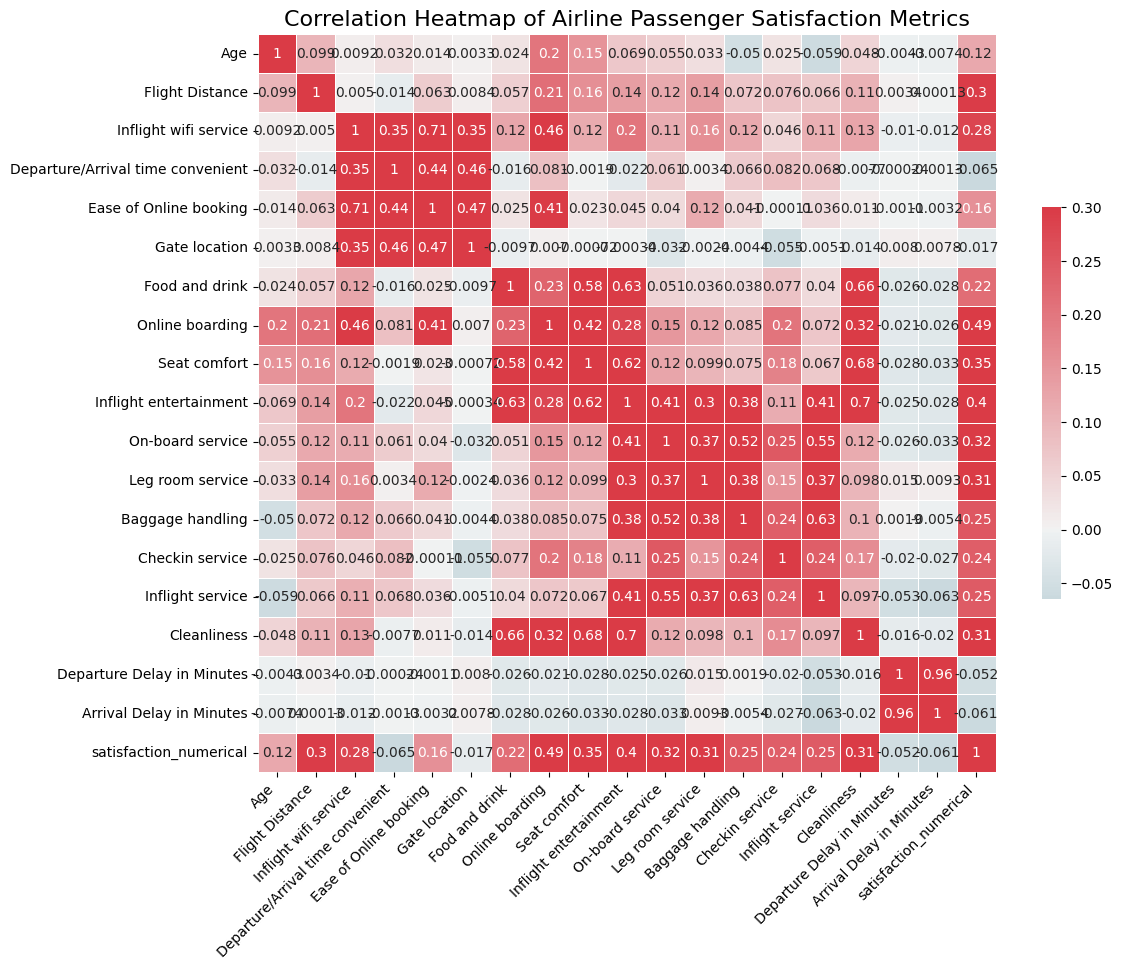

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Map satisfaction to numerical values for correlation
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
data['satisfaction_numerical'] = data['satisfaction'].map(satisfaction_mapping)

# Select numerical columns including the new numerical satisfaction
numerical_columns = ['Age', 'Flight Distance', 'Inflight wifi service',
                     'Departure/Arrival time convenient', 'Ease of Online booking',
                     'Gate location', 'Food and drink', 'Online boarding',
                     'Seat comfort', 'Inflight entertainment', 'On-board service',
                     'Leg room service', 'Baggage handling', 'Checkin service',
                     'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
                     'Arrival Delay in Minutes', 'satisfaction_numerical']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Improve the visibility of the heatmap
plt.title('Correlation Heatmap of Airline Passenger Satisfaction Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


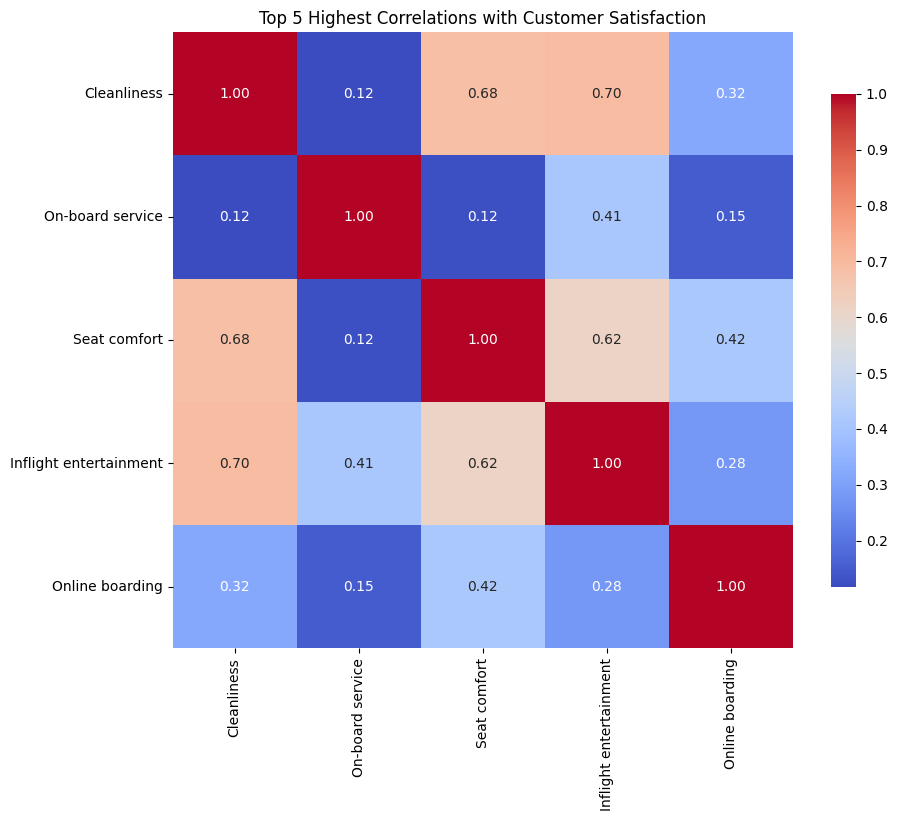

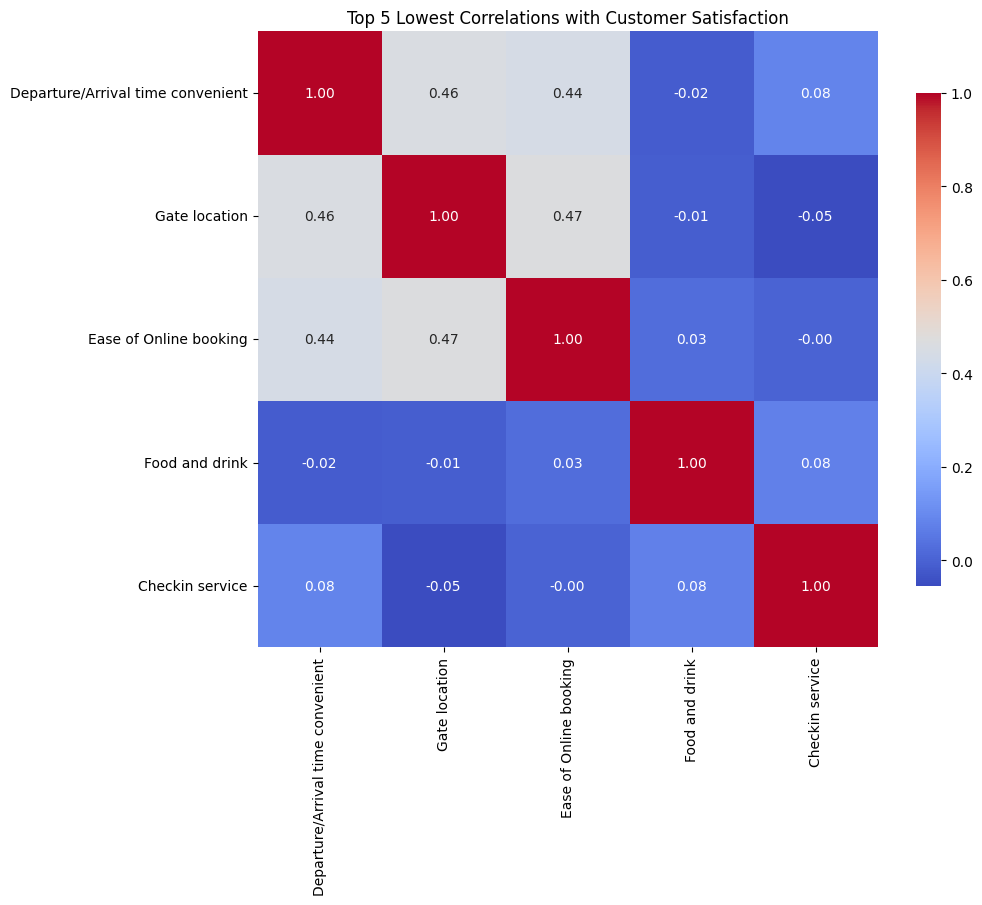

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Map satisfaction to numerical values for correlation
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
data['satisfaction_numerical'] = data['satisfaction'].map(satisfaction_mapping)

# List of relevant service rating columns
service_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
                   'Ease of Online booking', 'Gate location', 'Food and drink',
                   'Online boarding', 'Seat comfort', 'Inflight entertainment',
                   'On-board service', 'Leg room service', 'Baggage handling',
                   'Checkin service', 'Inflight service', 'Cleanliness']

# Calculate the correlation matrix
correlation_matrix = data[service_columns + ['satisfaction_numerical']].corr()

# Select the 'satisfaction_numerical' row and sort it
satisfaction_corr = correlation_matrix['satisfaction_numerical'].sort_values()

# Identify top 5 highest and lowest correlations excluding the 'satisfaction_numerical' itself
top_5_highest = satisfaction_corr.index[-6:-1]  # Excludes itself
top_5_lowest = satisfaction_corr.index[:5]

# Function to create heatmap
def create_heatmap(columns, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix.loc[columns, columns], annot=True, cmap='coolwarm', cbar_kws={"shrink": .8}, fmt=".2f")
    plt.title(title)
    plt.show()

# Generate heatmaps
create_heatmap(top_5_highest, 'Top 5 Highest Correlations with Customer Satisfaction')
create_heatmap(top_5_lowest, 'Top 5 Lowest Correlations with Customer Satisfaction')


                                   count       mean        std  min   25%  \
Class    satisfaction                                                       
Business neutral or dissatisfied  3809.0  39.399580  13.974221  7.0  29.0   
         satisfied                8686.0  42.835367  12.033290  7.0  35.0   
Eco      neutral or dissatisfied  9322.0  37.251448  17.224857  7.0  23.0   
         satisfied                2242.0  37.909902  15.013452  7.0  24.0   
Eco Plus neutral or dissatisfied  1442.0  39.057559  17.416963  7.0  26.0   
         satisfied                 475.0  38.905263  13.937681  8.0  28.0   

                                   50%   75%   max  
Class    satisfaction                               
Business neutral or dissatisfied  38.0  49.0  85.0  
         satisfied                44.0  52.0  85.0  
Eco      neutral or dissatisfied  36.0  51.0  85.0  
         satisfied                38.0  49.0  80.0  
Eco Plus neutral or dissatisfied  38.0  53.0  85.0  
         sat

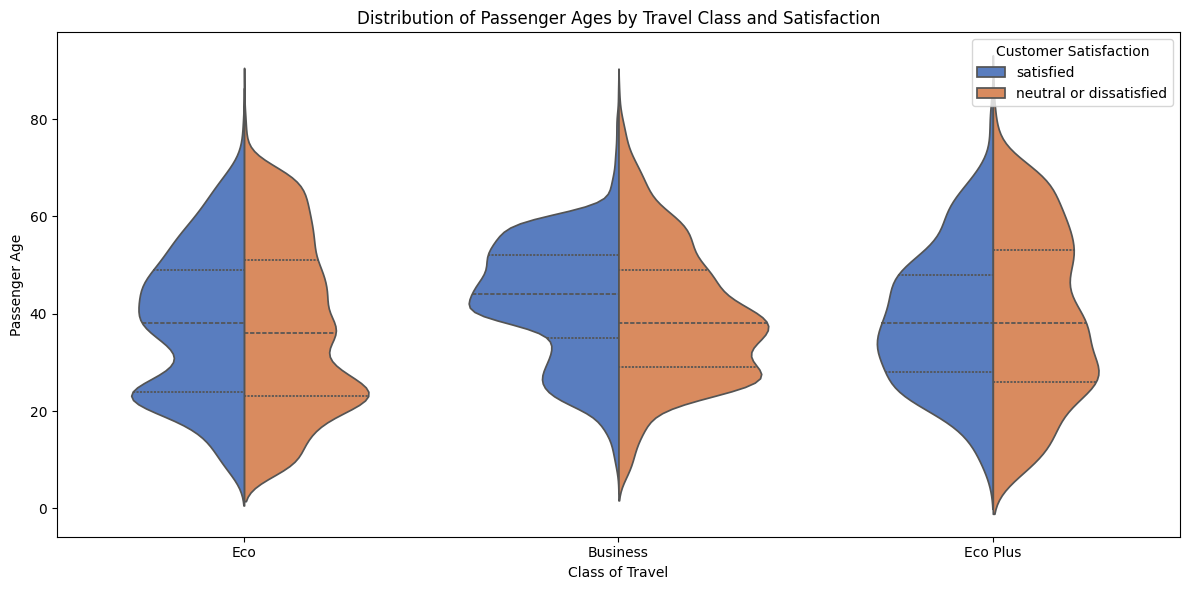

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Calculate descriptive statistics
descriptive_stats = data.groupby(['Class', 'satisfaction'])['Age'].describe()

# Print descriptive statistics
print(descriptive_stats)

# Prepare the figure
plt.figure(figsize=(12, 6))

# Create violin plots
sns.violinplot(x='Class', y='Age', hue='satisfaction', data=data, split=True, inner='quartile', palette='muted')

# Customize the plot
plt.title('Distribution of Passenger Ages by Travel Class and Satisfaction')
plt.xlabel('Class of Travel')
plt.ylabel('Passenger Age')
plt.legend(title='Customer Satisfaction', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



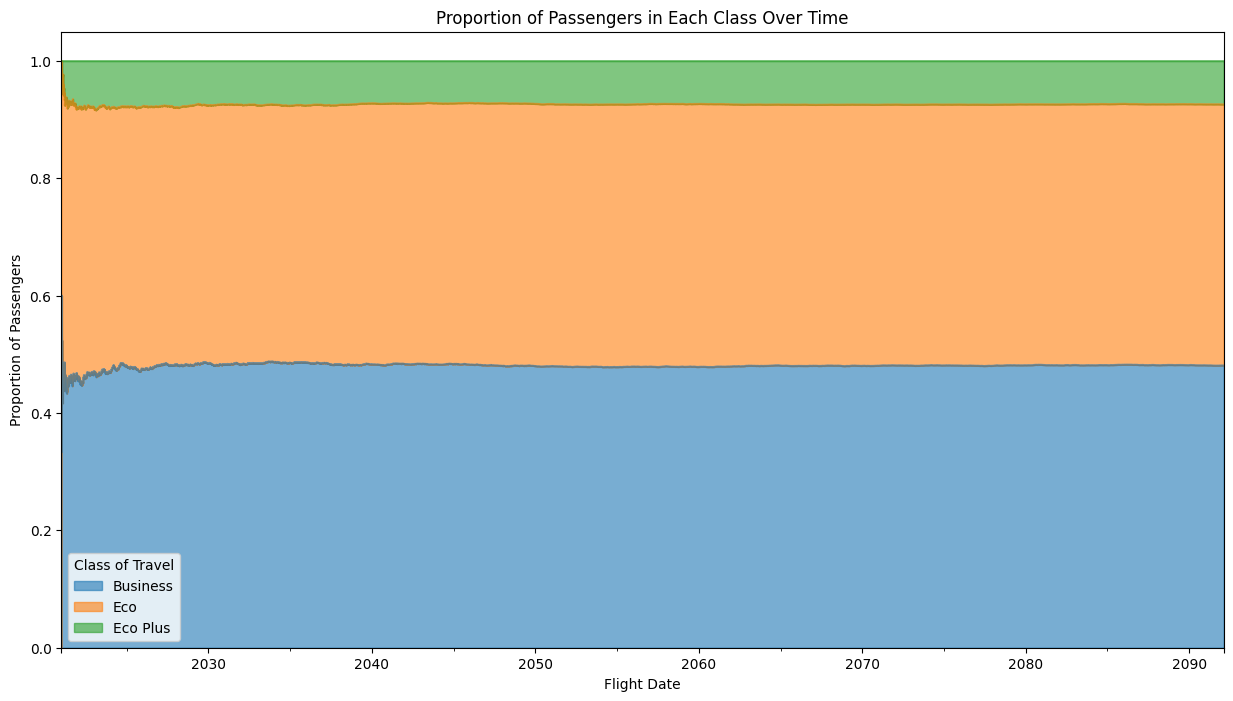

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Simulate a 'Flight Date' column if not present
np.random.seed(0)  # for reproducibility
data['Flight Date'] = pd.date_range(start='2021-01-01', periods=len(data), freq='D')

# Group data by 'Flight Date' and 'Class', and count the number of passengers in each class per day
class_data = data.groupby(['Flight Date', 'Class']).size().unstack(fill_value=0).cumsum()

# Normalize data to show proportions instead of absolute counts
class_data = class_data.div(class_data.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(15, 8))
class_data.plot.area(ax=plt.gca(), alpha=0.6)
plt.title('Proportion of Passengers in Each Class Over Time')
plt.xlabel('Flight Date')
plt.ylabel('Proportion of Passengers')
plt.legend(title='Class of Travel')

# Show the plot
plt.show()


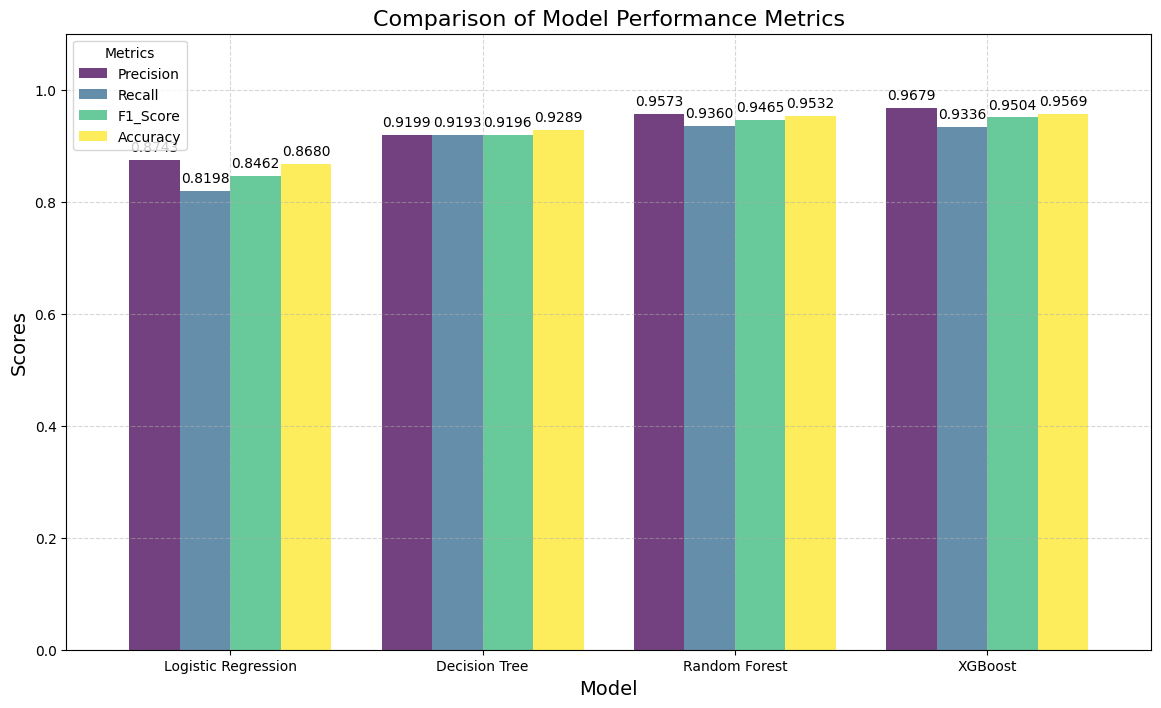

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Precision': [0.87426, 0.91994, 0.95731, 0.96790],
    'Recall': [0.81983, 0.91930, 0.93600, 0.93357],
    'F1_Score': [0.84617, 0.91962, 0.94654, 0.95042],
    'Accuracy': [0.86803, 0.92886, 0.95319, 0.95688]
}

df = pd.DataFrame(data)

# Set the index to 'Model'
df.set_index('Model', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(14, 8), width=0.8, alpha=0.75, colormap='viridis')

# Customizing the plot
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=0)  # Rotate model names for better visibility
plt.ylim(0, 1.1)  # Set y-axis limit to make the bars easier to compare
plt.grid(True, linestyle='--', which='both', alpha=0.5)  # Add gridlines for easier reading

# Add value labels on top of each bar for clarity
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Show the plot
plt.legend(title='Metrics')
plt.show()


In [19]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame with the provided data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Precision': [0.87426, 0.91994, 0.95731, 0.96790],
    'Recall': [0.81983, 0.91930, 0.93600, 0.93357],
    'F1_Score': [0.84617, 0.91962, 0.94654, 0.95042],
    'Accuracy': [0.86803, 0.92886, 0.95319, 0.95688]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Create a figure
fig = go.Figure()

# Add bar for each metric
for column in df.columns:
    fig.add_trace(go.Bar(
        x=df.index,
        y=df[column],
        name=column
    ))

# Update the layout for a clearer view
fig.update_layout(
    barmode='group',  # This will group bars for the same index
    title='Interactive Comparison of Model Performance Metrics',
    xaxis_title='Model',
    yaxis_title='Scores',
    legend_title='Metrics',
    plot_bgcolor='white',
    yaxis=dict(range=[0, 1.1])  # Set y-axis range to align with non-interactive version
)

# Customize hover information
fig.update_traces(hoverinfo="name+y")

# Show the plot
fig.show()


In [20]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame with the provided data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Precision': [0.87426, 0.91994, 0.95731, 0.96790],
    'Recall': [0.81983, 0.91930, 0.93600, 0.93357],
    'F1_Score': [0.84617, 0.91962, 0.94654, 0.95042],
    'Accuracy': [0.86803, 0.92886, 0.95319, 0.95688]
}

df = pd.DataFrame(data)

# Prepare data for the radar chart
categories = ['Precision', 'Recall', 'F1_Score', 'Accuracy']

fig = go.Figure()

# Add a trace for each model
for index, row in df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row['Precision'], row['Recall'], row['F1_Score'], row['Accuracy']],
        theta=categories,
        fill='toself',
        name=row['Model']
    ))

# Update the layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    title='Radar Chart of Model Performance',
    legend_title='Model'
)

# Show the plot
fig.show()


In [21]:
import pandas as pd
import plotly.graph_objects as go

# Load the data (replace this with the actual path to your CSV file)
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Calculate average ratings for each class
average_ratings = data.groupby('Class').agg({
    'Inflight wifi service': 'mean',
    'Seat comfort': 'mean',
    'Food and drink': 'mean',
    'Online boarding': 'mean',
    'Inflight entertainment': 'mean',
    'Cleanliness': 'mean'
}).reset_index()

# Prepare categories for the radar chart
categories = ['Inflight wifi service', 'Seat comfort', 'Food and drink', 'Online boarding', 'Inflight entertainment', 'Cleanliness']

# Initialize the radar chart
fig = go.Figure()

# Add a trace for each class
for index, row in average_ratings.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories].values,
        theta=categories,
        fill='toself',
        name=row['Class']
    ))

# Update the layout for a better visual
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]  # Assuming service ratings are scored from 1 to 5
        )
    ),
    title='Radar Chart of Average Service Ratings by Class',
    legend_title='Class of Travel'
)

# Show the plot
fig.show()


In [23]:


# Filter data by gender and satisfaction
male_data = data[(data['Gender'] == 'Male')]
female_data = data[(data['Gender'] == 'Female')]

# Calculate statistics for males
male_satisfied = male_data[male_data['satisfaction'] == 'satisfied']
male_dissatisfied = male_data[male_data['satisfaction'] == 'neutral or dissatisfied']

male_satisfied_stats = male_satisfied.describe()
male_dissatisfied_stats = male_dissatisfied.describe()

# Calculate statistics for females
female_satisfied = female_data[female_data['satisfaction'] == 'satisfied']
female_dissatisfied = female_data[female_data['satisfaction'] == 'neutral or dissatisfied']

female_satisfied_stats = female_satisfied.describe()
female_dissatisfied_stats = female_dissatisfied.describe()

# Print statistics
print("Statistics for Males with Satisfaction:")
print("Satisfied:")
print(male_satisfied_stats)
print("\nDissatisfied:")
print(male_dissatisfied_stats)

print("\nStatistics for Females with Satisfaction:")
print("Satisfied:")
print(female_satisfied_stats)
print("\nDissatisfied:")
print(female_dissatisfied_stats)


Statistics for Males with Satisfaction:
Satisfied:
         Unnamed: 0             id          Age  Flight Distance  \
count   5668.000000    5668.000000  5668.000000      5668.000000   
mean   12913.500706   65286.139555    41.747706      1523.248412   
std     7568.658360   37562.338272    12.939498      1131.967558   
min        3.000000      35.000000     7.000000        67.000000   
25%     6267.500000   32564.250000    32.000000       507.000000   
50%    12897.000000   64852.000000    43.000000      1205.000000   
75%    19549.750000   98209.250000    52.000000      2409.000000   
max    25974.000000  129779.000000    80.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count            5668.000000                        5668.000000   
mean                3.120325                           2.930487   
std                 1.601015                           1.566851   
min                 0.000000                           0.000000   
2

In [25]:


# Calculate the total count of satisfied individuals
total_satisfied = len(data[data['satisfaction'] == 'satisfied'])

# Filter data by gender and satisfaction
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Calculate the count of satisfied individuals for each gender
male_satisfied_count = len(male_data[male_data['satisfaction'] == 'satisfied'])
female_satisfied_count = len(female_data[female_data['satisfaction'] == 'satisfied'])

# Calculate the percentage of satisfied individuals for each gender
male_satisfied_percentage = (male_satisfied_count / len(male_data)) * 100
female_satisfied_percentage = (female_satisfied_count / len(female_data)) * 100

# Print the percentages
print("Percentage of satisfied individuals among men: {:.2f}%".format(male_satisfied_percentage))
print("Percentage of satisfied individuals among women: {:.2f}%".format(female_satisfied_percentage))


Percentage of satisfied individuals among men: 44.27%
Percentage of satisfied individuals among women: 43.54%


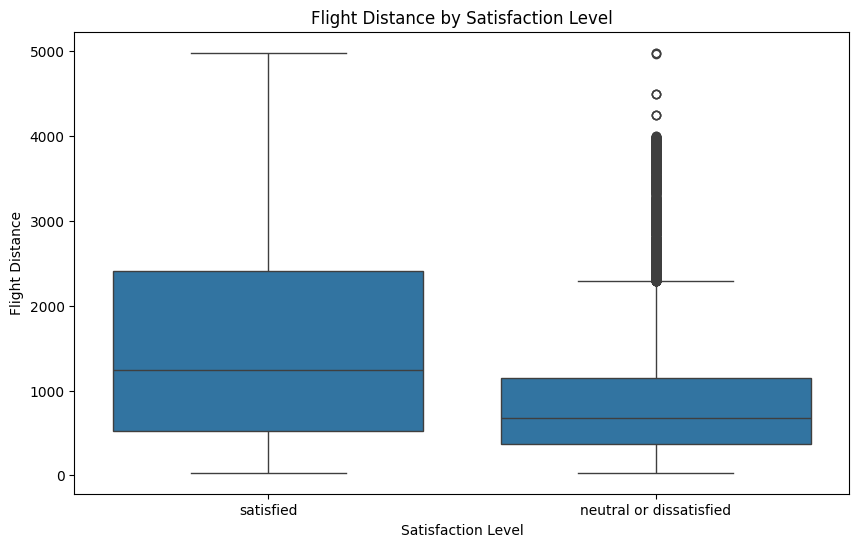

Summary Statistics for 'Satisfied' Satisfaction Level:
count    11403.000000
mean      1527.165746
std       1125.548796
min         31.000000
25%        521.000000
50%       1237.000000
75%       2409.000000
max       4983.000000
Name: Flight Distance, dtype: float64

Summary Statistics for 'Neutral or Not Satisfied' Satisfaction Level:
count    14573.000000
mean       932.929253
std        794.701314
min         31.000000
25%        374.000000
50%        679.000000
75%       1142.000000
max       4983.000000
Name: Flight Distance, dtype: float64


In [29]:


# Filter data for "satisfied" and "neutral or not satisfied" satisfaction levels
satisfied_data = data[data['satisfaction'] == 'satisfied']
dissatisfied_data = data[data['satisfaction'] == 'neutral or dissatisfied']

# Combine data for the box plot
combined_data = pd.concat([satisfied_data, dissatisfied_data])

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=combined_data)
plt.title('Flight Distance by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Flight Distance')
plt.show()

# Summary statistics
print("Summary Statistics for 'Satisfied' Satisfaction Level:")
print(satisfied_data['Flight Distance'].describe())
print("\nSummary Statistics for 'Neutral or Not Satisfied' Satisfaction Level:")
print(dissatisfied_data['Flight Distance'].describe())


C:\Users\langl\AppData\Local\Temp\ipykernel_20196\568435382.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




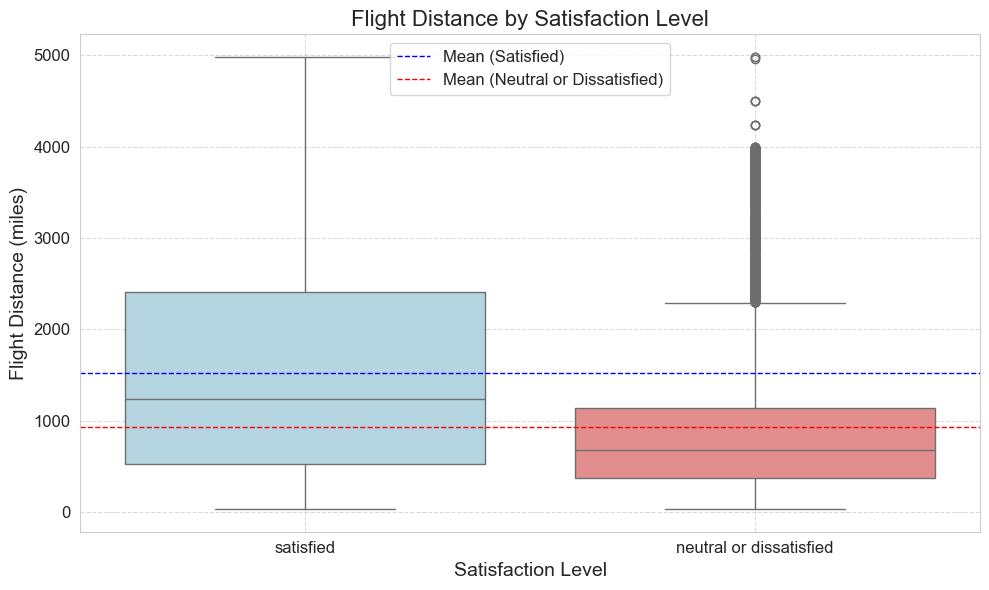

Summary Statistics for 'Satisfied' Satisfaction Level:
count    11403.000000
mean      1527.165746
std       1125.548796
min         31.000000
25%        521.000000
50%       1237.000000
75%       2409.000000
max       4983.000000
Name: Flight Distance, dtype: float64

Summary Statistics for 'Neutral or Not Satisfied' Satisfaction Level:
count    14573.000000
mean       932.929253
std        794.701314
min         31.000000
25%        374.000000
50%        679.000000
75%       1142.000000
max       4983.000000
Name: Flight Distance, dtype: float64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create the box plot with improved aesthetics
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=combined_data, palette={"satisfied": "lightblue", "neutral or dissatisfied": "lightcoral"})
plt.title('Flight Distance by Satisfaction Level', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=14)
plt.ylabel('Flight Distance (miles)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Add a horizontal line for the mean of each group
mean_flight_dist_satisfied = satisfied_data['Flight Distance'].mean()
mean_flight_dist_dissatisfied = dissatisfied_data['Flight Distance'].mean()
plt.axhline(y=mean_flight_dist_satisfied, color='blue', linestyle='--', linewidth=1, label='Mean (Satisfied)')
plt.axhline(y=mean_flight_dist_dissatisfied, color='red', linestyle='--', linewidth=1, label='Mean (Neutral or Dissatisfied)')
plt.legend(fontsize=12)

plt.show()

# Summary statistics
print("Summary Statistics for 'Satisfied' Satisfaction Level:")
print(satisfied_data['Flight Distance'].describe())
print("\nSummary Statistics for 'Neutral or Not Satisfied' Satisfaction Level:")
print(dissatisfied_data['Flight Distance'].describe())


                                   count       mean        std  min   25%  \
Class    satisfaction                                                       
Business neutral or dissatisfied  3809.0  39.399580  13.974221  7.0  29.0   
         satisfied                8686.0  42.835367  12.033290  7.0  35.0   
Eco      neutral or dissatisfied  9322.0  37.251448  17.224857  7.0  23.0   
         satisfied                2242.0  37.909902  15.013452  7.0  24.0   
Eco Plus neutral or dissatisfied  1442.0  39.057559  17.416963  7.0  26.0   
         satisfied                 475.0  38.905263  13.937681  8.0  28.0   

                                   50%   75%   max  
Class    satisfaction                               
Business neutral or dissatisfied  38.0  49.0  85.0  
         satisfied                44.0  52.0  85.0  
Eco      neutral or dissatisfied  36.0  51.0  85.0  
         satisfied                38.0  49.0  80.0  
Eco Plus neutral or dissatisfied  38.0  53.0  85.0  
         sat

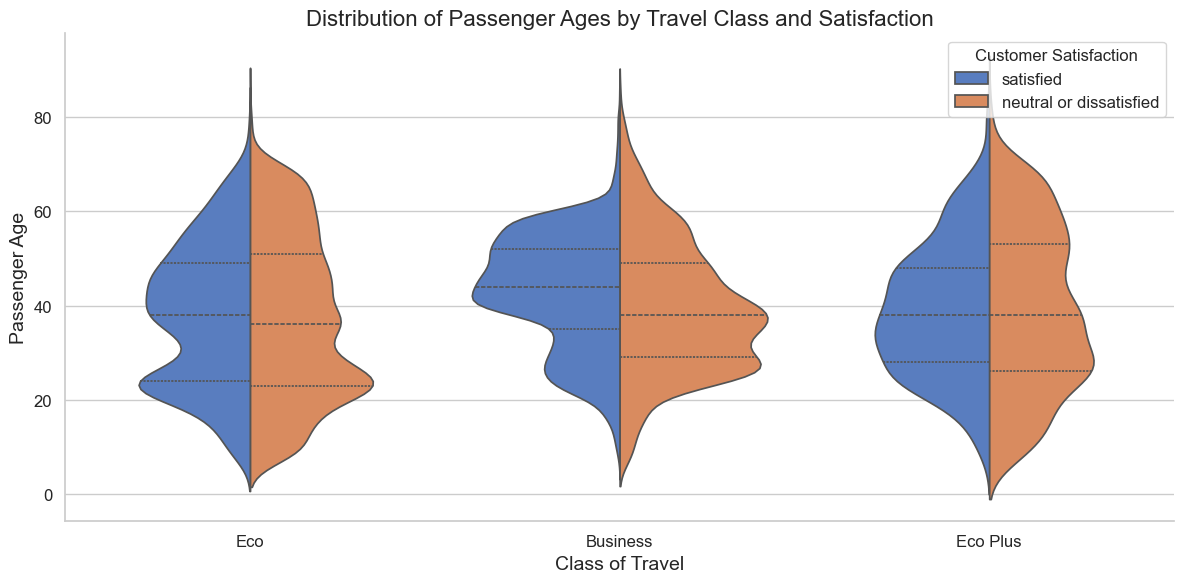

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Data/Airline_Passenger_Satisfaction.csv')

# Calculate descriptive statistics
descriptive_stats = data.groupby(['Class', 'satisfaction'])['Age'].describe()

# Print descriptive statistics
print(descriptive_stats)

# Set style
sns.set(style="whitegrid")

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create violin plots
sns.violinplot(x='Class', y='Age', hue='satisfaction', data=data, split=True, inner='quartile', palette='muted', ax=ax)

# Set title and labels
ax.set_title('Distribution of Passenger Ages by Travel Class and Satisfaction', fontsize=16)
ax.set_xlabel('Class of Travel', fontsize=14)
ax.set_ylabel('Passenger Age', fontsize=14)

# Set legend
ax.legend(title='Customer Satisfaction', loc='upper right', fontsize=12)

# Adjust tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()
